# Introduction


On this notebook, we'll be testing some ML models to predict the presence or absence of heart diseases over the [Heart Disease Classification Dataset](https://raw.githubusercontent.com/jorodrigues01/Classificacao-de-Doenca-Cardiovascular/main/HeartAttack.csv) which can be found on Kaggle. \
The algorithms used to classificate the models are: Logistic Regression, k Nearest Neighbors and Decision Trees

## Data
The dataset has been taken from Kaggle, but the data was published by Erbil Polytechnic from University of Kurdistan Hewler.

## Import and read
Here we import some of the main libraries needed for the analysis, and read the dataset of the study

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/jorodrigues01/Classificacao-de-Doenca-Cardiovascular/main/HeartAttack.csv"
df = pd.read_csv(url)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Renaming the columns and returning the head to see the changes

In [ ]:
df.rename(columns={'age': 'Age',
                   'gender': 'Gender',
                   'impluse': 'Heart_Rate',
                   'pressurehight': 'Pressure_High',
                   'pressurelow': 'Pressure_Low',
                   'glucose': 'Glucose',
                   'kcm': 'CK_MB',
                   'troponin': 'Troponin',
                   'class': 'Class'}, inplace=True)
df.head()

,Age,Gender,Heart_Rate,Pressure_High,Pressure_Low,Glucose,CK_MB,Troponin,Class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Checking if there's any missing value.

In [ ]:
print(f'{df.isna().sum().sum()} observations got missing values')
print('By column:')
df.isna().sum()

0 observations got missing values
By column:


Age              0
Gender           0
Heart_Rate       0
Pressure_High    0
Pressure_Low     0
Glucose          0
CK_MB            0
Troponin         0
Class            0
dtype: int64

In the target column, we replace the string values('negative', 'positive') for binary (0, 1)

In [ ]:
df.Class = np.where(df.Class == 'positive', 1, 0)
df.head()

,Age,Gender,Heart_Rate,Pressure_High,Pressure_Low,Glucose,CK_MB,Troponin,Class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


# Exploratory Data Analysis

Here we can see the boxplots for each non-binary variable

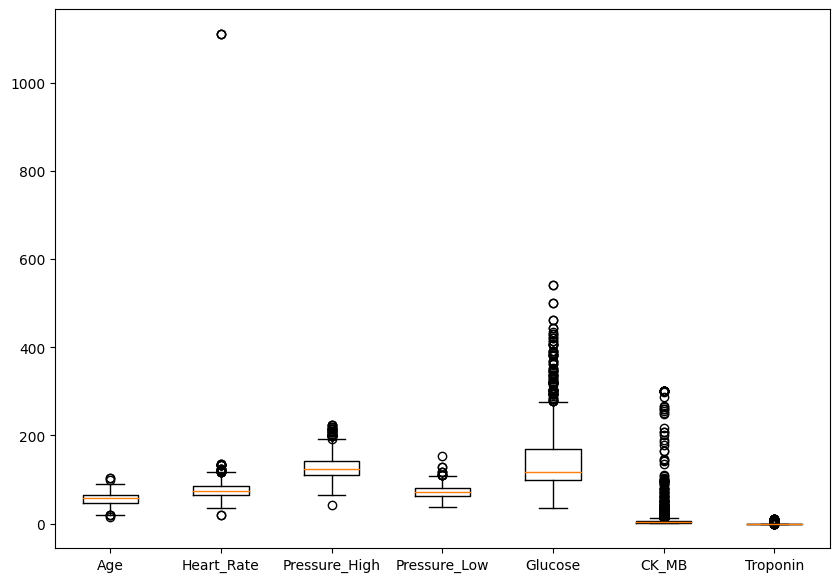

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,7))

linear_columns=df.drop(columns=['Gender', 'Class'])
bp = plt.boxplot(linear_columns)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FixedFormatter(linear_columns.columns))

plt.show()

By simply glancing over this plot, we can notice the presence of some noise data in `Heart_Rate`, some samples are above 1000 BPM, which is kind of impossible to be true. So we remove that noise, afterwards we discover that it didn't represented a considerable number of observations, but just 3.

In [ ]:
df = df[df['Heart_Rate'] < 1000].reset_index(drop=True)

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1316 non-null   int64  
 1   Gender         1316 non-null   int64  
 2   Heart_Rate     1316 non-null   int64  
 3   Pressure_High  1316 non-null   int64  
 4   Pressure_Low   1316 non-null   int64  
 5   Glucose        1316 non-null   float64
 6   CK_MB          1316 non-null   float64
 7   Troponin       1316 non-null   float64
 8   Class          1316 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.7 KB
None


,Age,Gender,Heart_Rate,Pressure_High,Pressure_Low,Glucose,CK_MB,Troponin,Class
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,56.208207,0.660334,75.982523,127.139058,72.217325,146.718617,15.303153,0.360970,0.613982
std,13.637762,0.473776,15.276877,26.144139,14.007815,74.979672,46.375924,1.155668,0.487020
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.657500,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.812500,0.085250,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


Looking at the `df.describe()` output, we can infer that we got more male samples than female, giving us a approximately ratio of 1:3 (1 female sample for each 3 male samples).

$0.66 = \frac{x}{1316}\; ⇒ \;x=0.66*1316 \approx 869$

$\text{ratio} = \frac{1316-869}{1316} = 0.3396$

On this dataframe represents the mean data grouped by `Class`. On the `Gender` column, we can see some "tencency" that more men are affected by a Cardiovascular illness than women, but again, we need to have in mind that female and male numbers

In [ ]:
df.groupby('Class').mean()

,Age,Gender,Heart_Rate,Pressure_High,Pressure_Low,Glucose,CK_MB,Troponin
Class,,,,,,,,
0,52.133858,0.604331,75.852362,127.830709,72.395669,149.891142,2.555138,0.027026
1,58.769802,0.695545,76.064356,126.704208,72.105198,144.724010,23.317994,0.570926


On the next cells we got some plots to explore the data from the variables of the dataframe, so we can understand a little more about each one.

## Gender

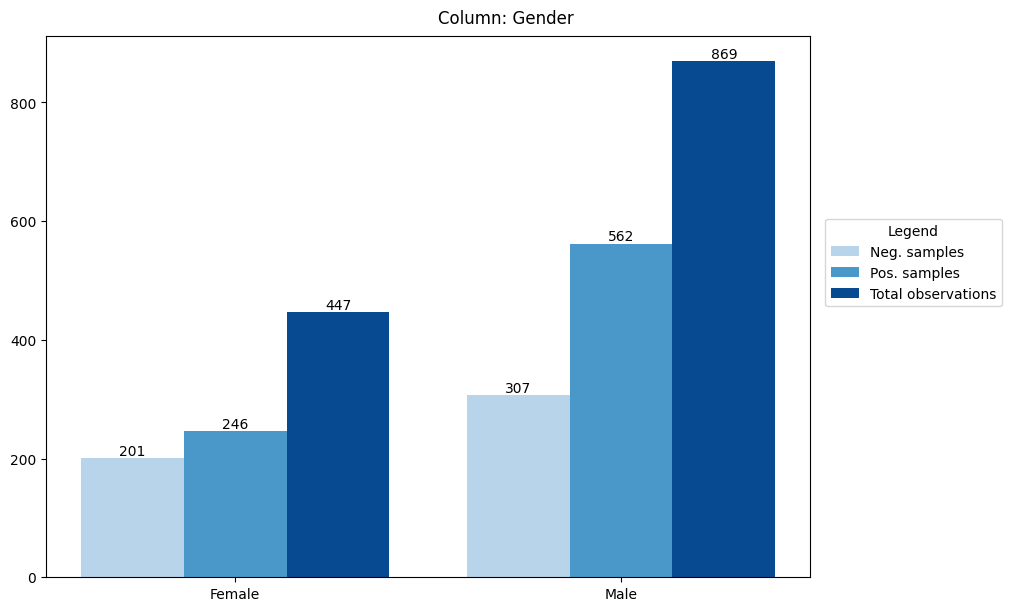

In [ ]:
neg = df[df.Class == 0]
pos = df[df.Class == 1]

fig, axs = plt.subplots(figsize=(10,6), constrained_layout=True)
fig.suptitle('Column: Gender')
# 0: Women  /   1: Men'

cmap = plt.get_cmap('Blues')
colors = cmap([0.3, 0.6, 0.9])

counts, edges, bars = axs.hist([neg.Gender, pos.Gender, df.Gender], bins=2,
                               label=['Neg. samples', 'Pos. samples',
                                      'Total observations'],
                               color=colors)

for b in bars:
    axs.bar_label(b)

axs.xaxis.set_major_locator(plt.FixedLocator([.25, .75]))
axs.xaxis.set_major_formatter(plt.FixedFormatter(['Female', 'Male']))
axs.legend(title='Legend', loc=(1.02, .5))


plt.show()

## Age

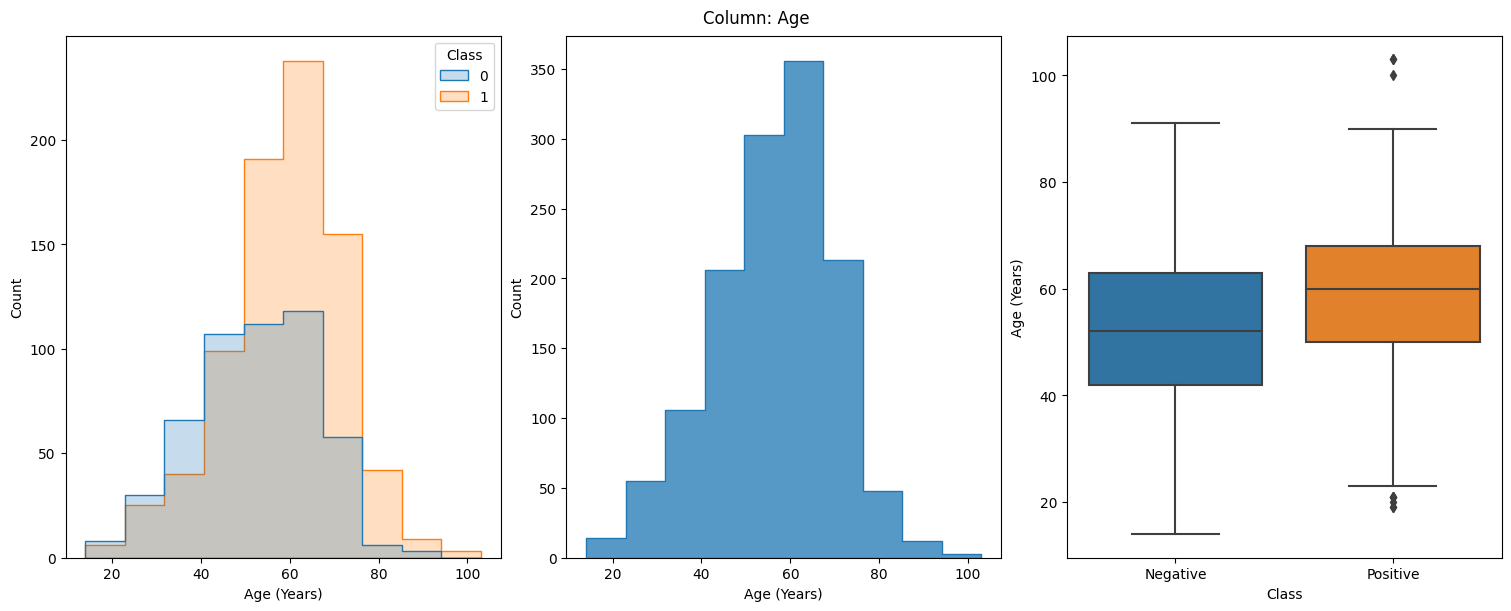

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: Age')

sns.histplot(data=df, x=df.Age, hue='Class', element="step", common_norm=False,
             ax=axs[0], bins=10)
axs[0].set_xlabel('Age (Years)')

sns.histplot(df.Age, element='step', ax=axs[1], bins=10)
axs[1].set_xlabel('Age (Years)')

sns.boxplot(data=df, x='Class', y=df.Age, ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('Age (Years)')

plt.show()

## Heart Rate

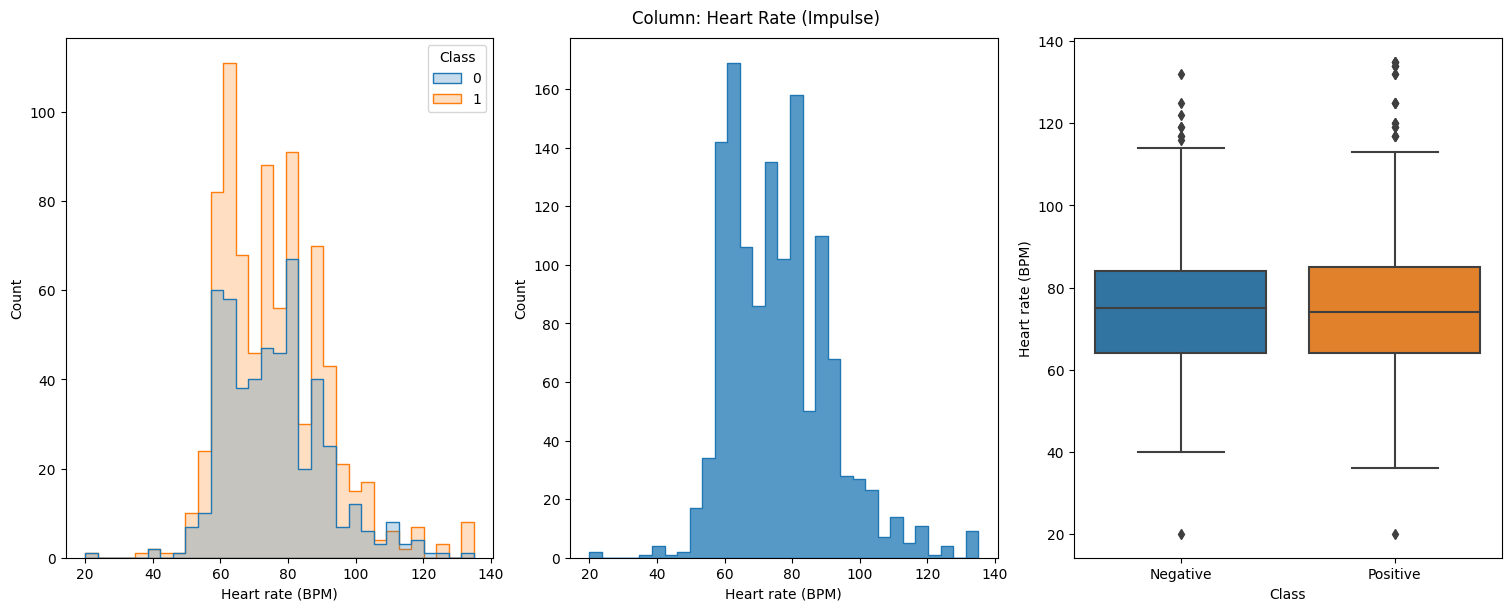

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: Heart Rate (Impulse)')

sns.histplot(data=df, x=df['Heart_Rate'], hue='Class', element="step",
             common_norm=False, ax=axs[0])
axs[0].set_xlabel('Heart rate (BPM)')

sns.histplot(df['Heart_Rate'], element="step", ax=axs[1])
axs[1].set_xlabel('Heart rate (BPM)')

sns.boxplot(data=df, x='Class', y=df['Heart_Rate'], ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('Heart rate (BPM)')

plt.show()

## Pressure High

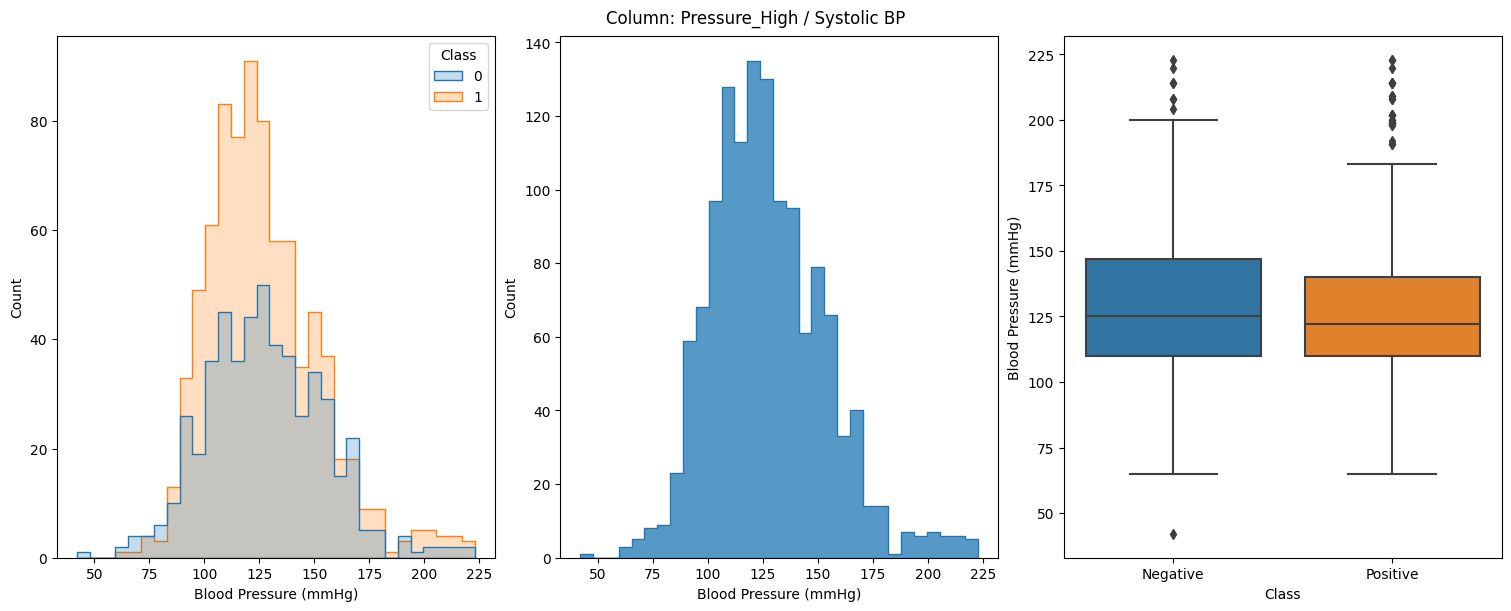

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: Pressure_High / Systolic BP')

sns.histplot(data=df, x=df['Pressure_High'], hue='Class', element="step",
             common_norm=False, ax=axs[0])
axs[0].set_xlabel('Blood Pressure (mmHg)')

sns.histplot(df['Pressure_High'], element="step", ax=axs[1])
axs[1].set_xlabel('Blood Pressure (mmHg)')

sns.boxplot(data=df, x='Class', y=df['Pressure_High'], ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('Blood Pressure (mmHg)')

plt.show()

## Pressure Low

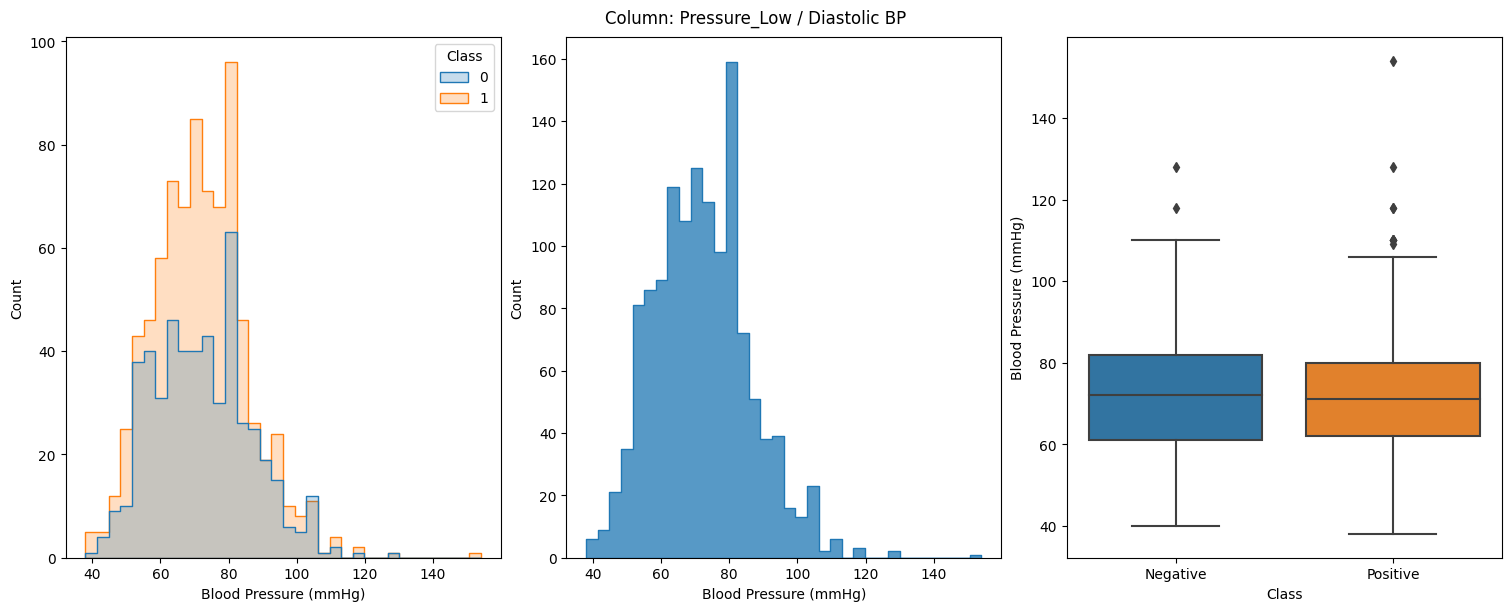

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: Pressure_Low / Diastolic BP')

sns.histplot(data=df, x=df['Pressure_Low'], hue='Class', element="step",
             common_norm=False, ax=axs[0])
axs[0].set_xlabel('Blood Pressure (mmHg)')

sns.histplot(df['Pressure_Low'], element="step", ax=axs[1])
axs[1].set_xlabel('Blood Pressure (mmHg)')

sns.boxplot(data=df, x='Class', y=df['Pressure_Low'], ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('Blood Pressure (mmHg)')

plt.show()

## Glucose

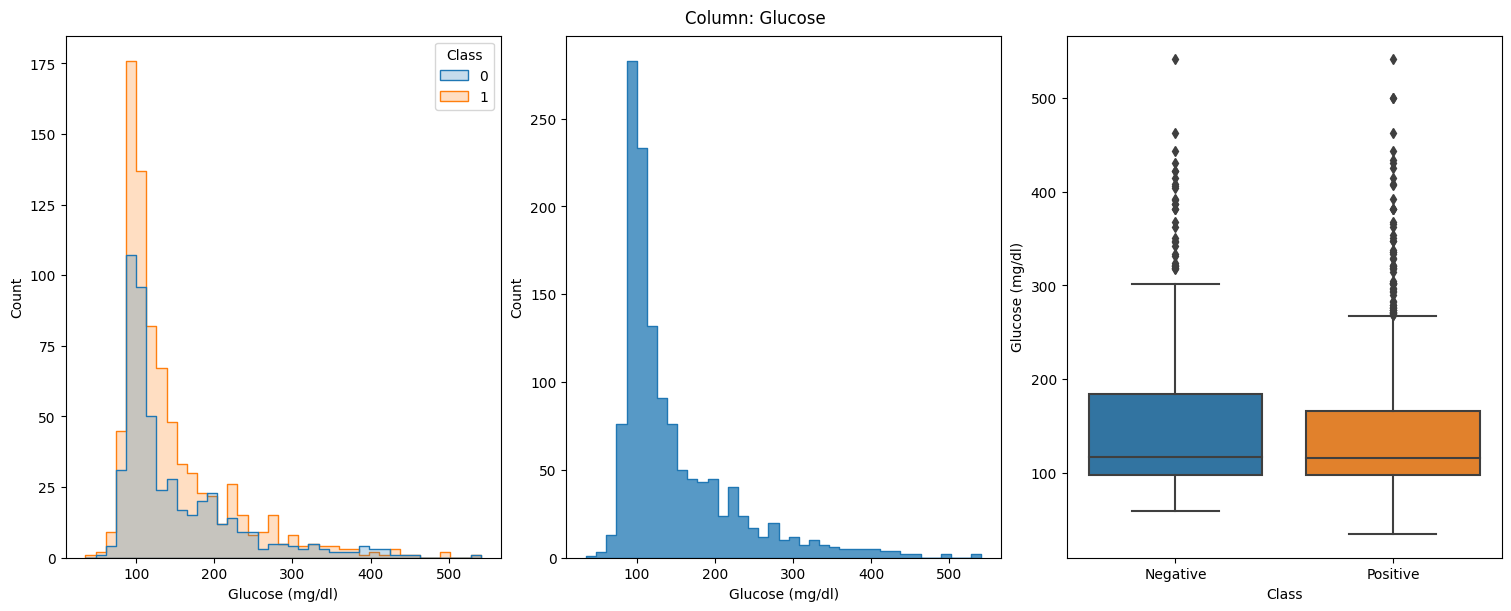

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: Glucose')

sns.histplot(data=df, x=df.Glucose, hue='Class', element="step",
             common_norm=False, ax=axs[0])
axs[0].set_xlabel('Glucose (mg/dl)')

sns.histplot(df.Glucose, element='step', ax=axs[1])
axs[1].set_xlabel('Glucose (mg/dl)')

sns.boxplot(data=df, x='Class', y=df.Glucose, ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('Glucose (mg/dl)')

plt.show()

## CK MB
By looking at the plots of `CK_MB` column below, we can indetify a great number of outliers samples, specially those classified as positive.

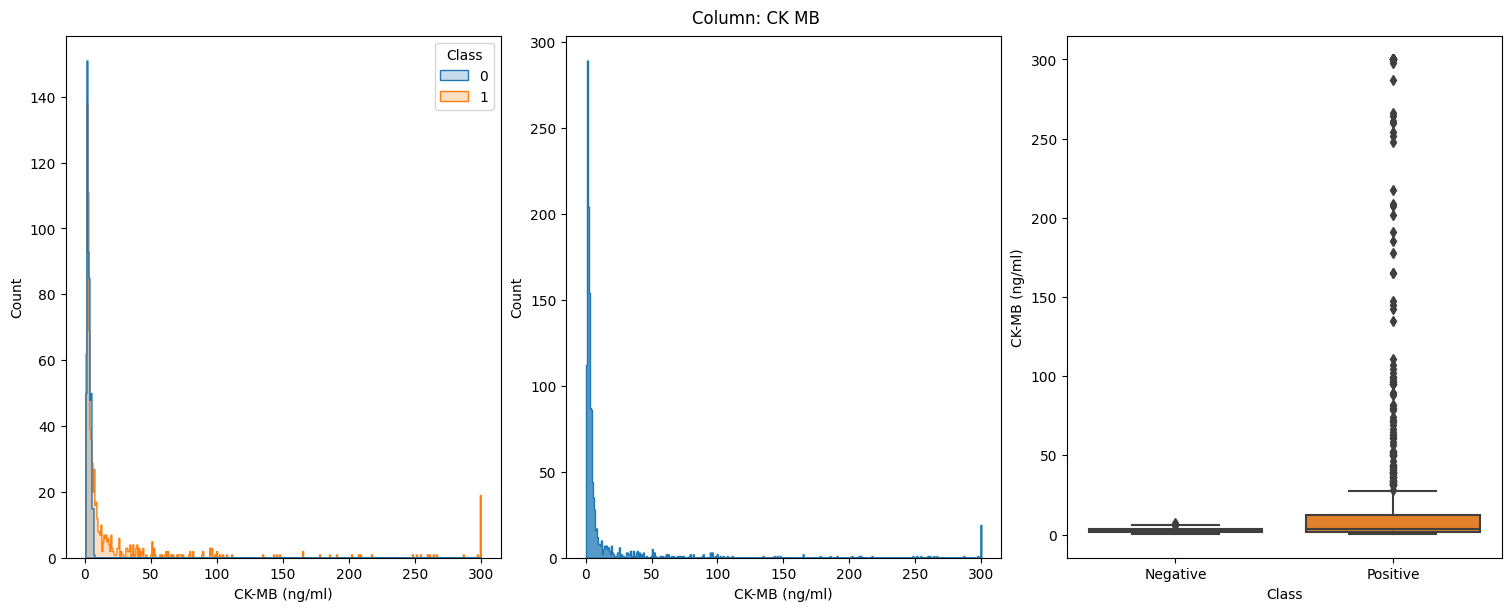

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: CK MB')

sns.histplot(data=df, x=df['CK_MB'], hue='Class', element="step",
             common_norm=False, ax=axs[0])
axs[0].set_xlabel('CK-MB (ng/ml)')

sns.histplot(df['CK_MB'], element="step", ax=axs[1])
axs[1].set_xlabel('CK-MB (ng/ml)')

sns.boxplot(data=df, x='Class', y=df['CK_MB'], ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('CK-MB (ng/ml)')

plt.show()

## Troponin

Just like the previous column that we could detect the presence of some noise, now analyzing the `Troponin` variable we fall under the same situation, but this time we see some outlier values from the negative class as well.

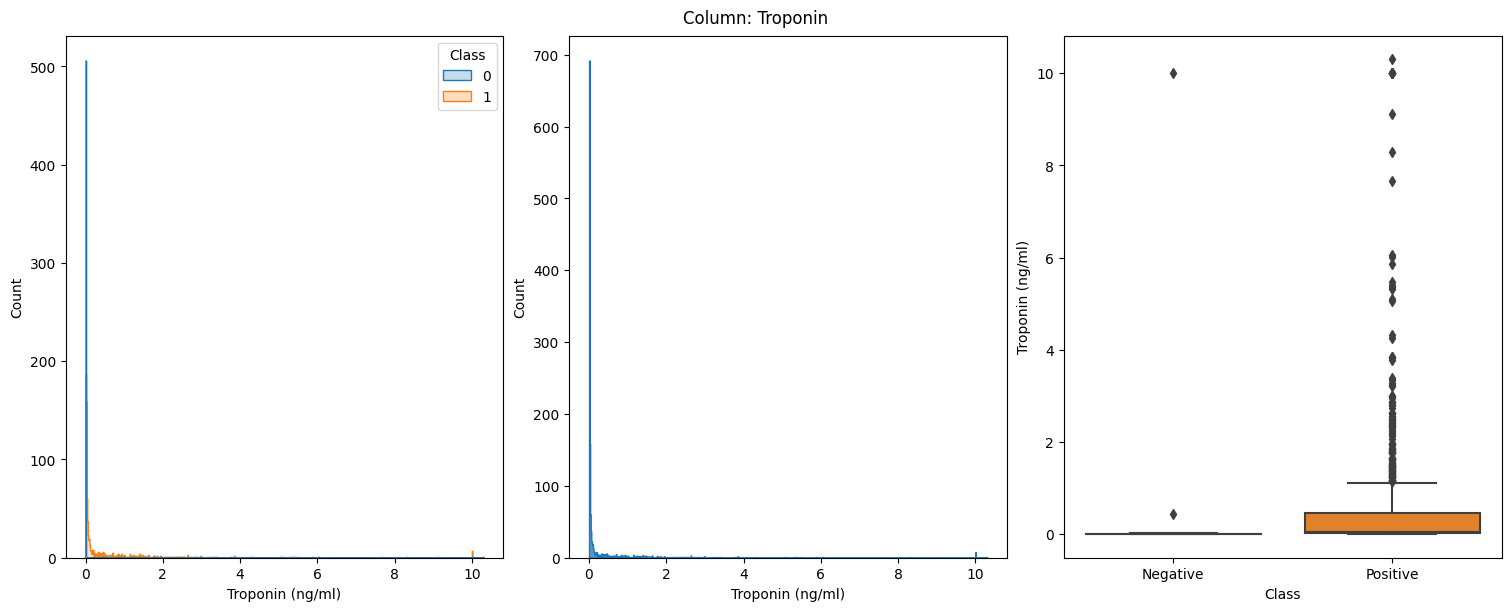

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,6), constrained_layout=True)
fig.suptitle('Column: Troponin')

sns.histplot(data=df, x=df.Troponin, hue='Class', element="step",
             common_norm=False, ax=axs[0])
axs[0].set_xlabel('Troponin (ng/ml)')

sns.histplot(df.Troponin, element='step', ax=axs[1])
axs[1].set_xlabel('Troponin (ng/ml)')

sns.boxplot(data=df, x='Class', y=df.Troponin, ax=axs[2])
axs[2].xaxis.set_major_formatter(plt.FixedFormatter(['Negative', 'Positive']))
axs[2].set_ylabel('Troponin (ng/ml)')


plt.show()

To clean out the noise on `CK_MB` and `Troponin` variables, we make use of the iqr method to get the limits of these features, so we're capable of dropping the outliers.

In [ ]:
def get_limits(data):
  q1 = data.quantile(.25)
  q3 = data.quantile(.75)

  iqr = q3 - q1

  lim_sup = q3 + 1.5 * iqr
  lim_inf = q1 - 1.5 * iqr

  return [lim_sup, lim_inf]


limits = get_limits(df.copy())
df = df[(df.CK_MB < limits[0][6]) & (df.Troponin < limits[0][7])]
df.describe()

,Age,Gender,Heart_Rate,Pressure_High,Pressure_Low,Glucose,CK_MB,Troponin,Class
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,55.481398,0.633596,75.808343,127.108230,72.298760,146.734724,3.095478,0.022707,0.429538
std,13.794257,0.482093,15.136378,25.905663,14.283245,77.263282,2.124962,0.034554,0.495289
min,14.000000,0.000000,20.000000,65.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,45.000000,0.000000,63.000000,110.000000,61.000000,97.000000,1.600000,0.005000,0.000000
50%,57.000000,1.000000,74.000000,125.000000,72.000000,115.000000,2.490000,0.009000,0.000000
75%,65.000000,1.000000,84.000000,144.000000,81.000000,169.500000,4.025000,0.023000,1.000000
max,91.000000,1.000000,135.000000,223.000000,154.000000,541.000000,11.940000,0.203000,1.000000


By dropping the noisy data on those 2 features, at this moment we got ourselves with 887 samples on the dataframe.

Here we plot a correlation to understand once again the behavior of the dataset's attributes when compared to one another.

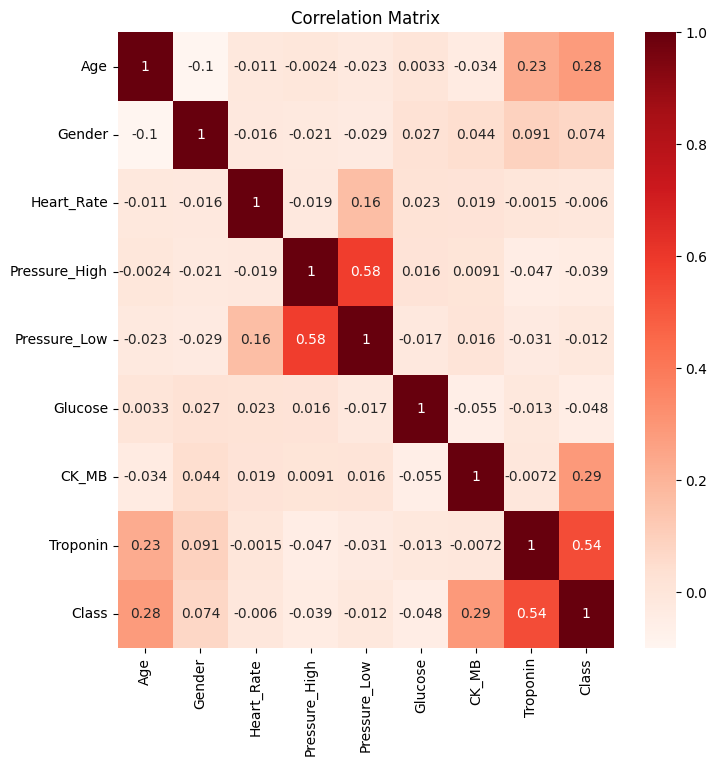

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', cbar=True)
plt.title('Correlation Matrix');

The greatest correlations here can be easily noticed: `Pressure_Low` x `Pressure_High` and `Troponin` x `Class`. But other than that, we see there's low correlation between variables.

# Classifiers

Now we proceed to apply the classifier algorithms over the frame

### Functions

In [ ]:
def accuracy(target, obtained):
  score = sum(target == obtained)/ len(target)
  return score

def z_score(data):
  #######   Z-Score FORMULA   ########
  #                                  #
  #      z' = (x-mean)/std_dev       #
  #                                  #
  ####################################
  return (data - np.mean(data, axis=0))/np.std(data, axis=0)

## Logistic Regression

In [ ]:
class LogisticReg:
    def __init__(self, eta=0.01, n_epochs=1000):
      self.learnRate = eta
      self.n_epochs = n_epochs
      self.weights = None
      self.bias = None


    def train(self, X, y):
      n_samples, n_features = X.shape

      self.weights = np.random.rand(n_features)
      self.bias = np.random.rand()

      for _ in range(self.n_epochs):
        for id in range(n_samples):
          linear = np.dot(X.iloc[id], self.weights) + self.bias
          y_pred = self.sigmoid(linear)

          error = y_pred - y.iloc[id]

          dweights = (1/n_samples) * np.dot(2*X.iloc[id], error)
          dbias = (1/n_samples) * 2 * error

          self.weights += -self.learnRate * dweights
          self.bias += -self.learnRate * dbias


    def test(self, X):
      linear = np.dot(X, self.weights) + self.bias
      prediction = self.sigmoid(linear)

      return np.where(prediction > .5, 1, 0)


    def sigmoid(self, linear):
      return 1/(1 + np.exp(-linear))



Creating the object of `LogisticReg` classifier and training the set.

In [ ]:
features = z_score(df.drop(columns='Class'))
label = df.Class

X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0, test_size=0.25)

In [ ]:
logReg = LogisticReg(n_epochs=2000)
logReg.train(X_train, y_train)


Concluded the fit of the model, we must test to get the accuracy of it.

In [ ]:
LR_prediction = logReg.test(X_test)
print(f'Comparing the labels with the predictions obtained by the Logistic regression algorithm, we got a {accuracy(y_test, LR_prediction)} of accuracy! ')

Comparing the labels with the predictions obtained by the Logistic regression algorithm, we got a 0.8603603603603603 of accuracy! 


Using the logistic regression from `LogisticReg` class, our model got approximately a **86,04% of accuracy**.

## Decision Tree

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value


class DecisionTree():
    def __init__(self, min_split=2, max_depth=2):
        self.root = None
        self.min_split = min_split
        self.max_depth = max_depth


    def grow_decisionTree(self, X, y, curr_depth=0):
        num_samples, num_features = np.shape(X)
        n_classes = len(np.unique(y))

        if num_samples < self.min_split or curr_depth > self.max_depth or n_classes == 1:
          leaf_value = self.calculate_leaf_value(y)
          return Node(value=leaf_value)

        best_split = self.get_best_split(X, y, num_samples, num_features)

        if best_split["info_gain"] > 0:
            left_subtree = self.grow_decisionTree(best_split["frame_left"],
                                                best_split["y_left"], curr_depth+1)

            right_subtree = self.grow_decisionTree(best_split["frame_right"],
                                                 best_split["y_right"], curr_depth+1)

            return Node(best_split["feature_index"], best_split["threshold"],
                        left_subtree, right_subtree, best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(y)
        return Node(value=leaf_value)


    def get_best_split(self, X, y, num_samples, num_features):
        best_split = {}
        max_info_gain = -1

        for feature_index in range(num_features):
            feature_values = X.iloc[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                ids_left, ids_right = self.split(X, feature_index, threshold)

                if len(ids_left) == 0 and len(ids_right) == 0:
                    continue

                frame_left = pd.DataFrame([X.iloc[id] for id in ids_left], index=ids_left)
                frame_right = pd.DataFrame([X.iloc[id] for id in ids_right], index=ids_right)
                left_y, right_y = y.iloc[ids_left], y.iloc[ids_right]

                curr_info_gain = self.information_gain(y, left_y, right_y, "gini")

                if curr_info_gain > max_info_gain:
                    best_split["feature_index"] = feature_index
                    best_split["threshold"] = threshold
                    best_split["frame_left"] = frame_left
                    best_split["frame_right"] = frame_right
                    best_split["y_left"] = left_y
                    best_split["y_right"] = right_y
                    best_split["info_gain"] = curr_info_gain
                    max_info_gain = curr_info_gain

        return best_split


    def split(self, X, feature_index, threshold):
        ids_left = np.array([id for id in range(len(X)) if X.iloc[id, feature_index] <= float(threshold)])
        ids_right = np.array([id for id in range(len(X)) if X.iloc[id, feature_index] > float(threshold)])
        return ids_left, ids_right


    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)

        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain


    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0

        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy


    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0

        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini


    def calculate_leaf_value(self, y):
        y = list(y)
        return max(y, key=y.count)


    def fit(self, X, y):
        self.root = self.grow_decisionTree(X, y)


    def predict(self, X):
        return np.array([self.make_prediction(X.iloc[idx], self.root) for idx in range(len(X))])


    def make_prediction(self, x, tree):
        if tree.value!=None:
            return tree.value

        feature_val = x[tree.feature_index]

        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        return self.make_prediction(x, tree.right)



Training the `Decision Tree` model and visualizing its accuracy

In [ ]:
decTree = DecisionTree(min_split=2, max_depth=100)
decTree.fit(X_train, y_train)


In [ ]:
DT_prediction = decTree.predict(X_test)

print(f'Comparing the labels with the predictions obtained by the Decision Tree algorithm, we got a {accuracy(y_test, DT_prediction)} of accuracy! ')

Comparing the labels with the predictions obtained by the Decision Tree algorithm, we got a 0.9864864864864865 of accuracy! 


We achived a score of **98,65%**, which is pretty impressive.

## kNN

Implementing the kNN algorithm with the euclidian distance as well as the minkowski

In [ ]:
def euclidian_dist(row_1, row_2, d):
  return np.absolute((pd.to_numeric(row_1[d]) - pd.to_numeric(row_2[d]))**2)


def minkowski_dist(x_1, x_2):
  dims = len(x_1)
  distance = 0

  for d in range(dims):
    distance += euclidian_dist(x_1, x_2, d)

  return np.sqrt(distance)

In [ ]:
from collections import Counter

class KNN:
  def __init__(self, X, y, k=1):
    self.k = k
    self.NN = None
    self.distances = None
    self.X_train = X
    self.y_train = y


  def test(self, X):
    predict = list()

    for id, test_point in X.iterrows():
      dists=list()

      dists = np.array([minkowski_dist(test_point, train_point) for id, train_point in self.X_train.iterrows()])

      self.distances = pd.DataFrame(data=dists, columns=['Distances'], index=self.y_train.index.array)

      self.NN = self.distances.sort_values(by='Distances')[:self.k]

      predicted_label = Counter(self.y_train[self.NN.index]).most_common(1)

      predict.append(predicted_label[0][0])

    return predict


In [ ]:
knn = KNN(X_train, y_train, k=3)
KNN_prediction = knn.test(X_test)

print(f'Comparing the labels with the predictions obtained by the kNN algorithm, we got a {accuracy(y_test, KNN_prediction)} of accuracy! ')

Comparing the labels with the predictions obtained by the kNN algorithm, we got a 0.7927927927927928 of accuracy! 


In this model it's obtained a accuracy score of **79,28%**, for a **k=3**.

On the cells below we compare the performance of the algorithm over multiple values of k (only the odd numbers between 1 and 15).

In [ ]:
knn_accuracies = []
k_numbers = np.arange(1, 16, 2)

for k in k_numbers:
  knn = KNN(X_train, y_train, k)
  predict = knn.test(X_test)

  knn_accuracies.append(accuracy(y_test, predict))

knn_accuracies = pd.Series(knn_accuracies, index=k_numbers) * 100


In [ ]:
def addlabels(x, y, color, fontsize, gap=0):
    for i in x:
        plt.text(i, y[i]+gap, y[i], ha = 'center',
                 bbox = dict(facecolor = color), size=fontsize)

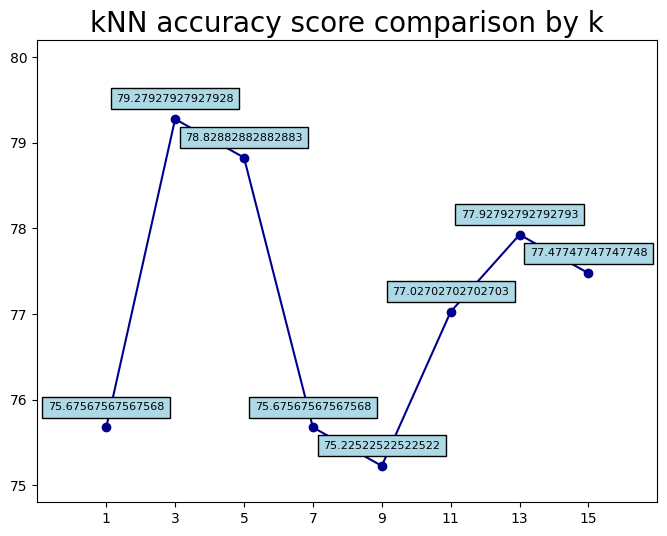

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(knn_accuracies, '-o', c='darkblue')
ax.xaxis.set_major_locator(plt.FixedLocator(range(1, 16, 2)))

addlabels(knn_accuracies.index, knn_accuracies, 'lightblue', 8, 0.2)

ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(75, 81, 1)))
ax.set_ylim((74.8, 80.2))
ax.set_xlim((-1, 17))

plt.title("kNN accuracy score comparison by k", {'fontsize': 20})

plt.show()

Looking at the plot, it's safe to say that on this model the highest accuracy score obtained is when the k is equal to 3.


In conclusion, of all the models tested on 3 classification algorithms: Logistic Regression, Decision Trees, kNN, we can safely put the Decision Tree classifier as the best, given the highest obtained accuracy score of 98,64%.

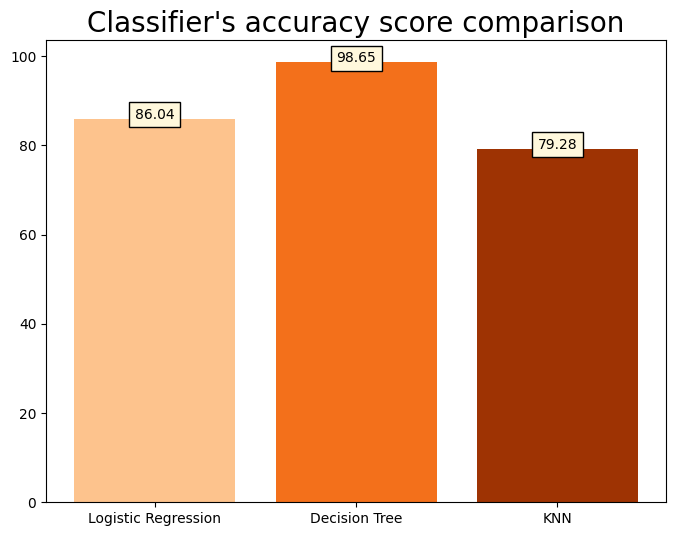

In [ ]:
accuracy_table = np.array([float("{:.4f}".format(accuracy(y_test, LR_prediction))),
                           float("{:.4f}".format(accuracy(y_test, DT_prediction))),
                           float("{:.4f}".format(accuracy(y_test, KNN_prediction)))])

accuracy_table*=100

fig, ax = plt.subplots(figsize=(8,6))

cmap = plt.get_cmap('Oranges')
colors = cmap([0.3, 0.6, 0.9])

ax.bar([0,1,2], accuracy_table, color=colors)

addlabels([0,1,2], accuracy_table, 'cornsilk', 10)

ax.xaxis.set_major_locator(plt.FixedLocator([0,1,2]))
ax.xaxis.set_major_formatter(plt.FixedFormatter(['Logistic Regression', 'Decision Tree', 'KNN']))
plt.title("Classifier's accuracy score comparison", {'fontsize': 20})

plt.show()